<h1>Аналіз та обробка БМД</h1>
<h2>БС-82</h2>
<h3 style="font-family:sans-serif;">Микита Любшин<h3>
  <link rel ="stylesheet" href="style.css"></link>

<h3>КРИТЕРІЙ ПІРСОНА ДЛЯ ПОРІВНЯННЯ ДЕКІЛЬКОЇ ГРУП ЗА РОЗПОДІЛЕННЯМ ОЗНАКИ</h3>

<h3>Завдання</h3>
<ul>
    <li>
Обрати реальні дані з kaggle або сгенерувати випадкові дані, що містять розподіл деякої ознаки в двох групах.</li><li>
Побудувати графік, що відображає розподіл ознак в групах.</li><li>
Написати функції, що оцінює зв'язок між ознакою та групою за критерієм Пірсона. Функція має оцінювати розбіжність на двох рівнях - 0,001 та 0,05, в залежністі від параметру significant_level, що передається в неї. Врахувати у функції випадок, що сума частот ознаки у групах може бути відмінною.</li><li>
Перевірити розбіжність на між групами на даних з п. 1. В результаті сформувати таблицю спряженості наступного вигляду:</li>
</ul>

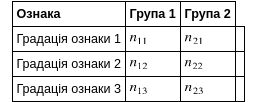


In [85]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
path = "./movie_metadata.csv"
data = pd.read_csv(path,encoding='utf-8')

In [86]:
data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [87]:
av_score = data['imdb_score'].mean() 
av_score

6.442137616498116

In [88]:
bigger_bw = list(filter( lambda x: x[1]["color"] == " Black and White" and x[1]["imdb_score"] < av_score, data.iterrows()))


In [89]:
bigger_color = list(filter( lambda x: x[1]["color"] == "Color" and x[1]["imdb_score"] >= av_score, data.iterrows()))
lower_color = list(filter( lambda x: x[1]["color"] == "Color" and x[1]["imdb_score"] < av_score, data.iterrows()))

bigger_bw = list(filter( lambda x: x[1]["color"] == " Black and White" and x[1]["imdb_score"] >= av_score, data.iterrows()))
lower_bw = list(filter( lambda x: x[1]["color"] == " Black and White" and x[1]["imdb_score"] < av_score, data.iterrows()))


            
sizes_color = list(map( len, [bigger_color, lower_color] ))
sizes_bw = list(map( len, [bigger_bw, lower_bw] ))

df=pd.DataFrame({
    "score":["lower than average","higher than average"],
                "Color":sizes_color,
                "Black and White":sizes_bw
})
df

,score,Color,Black and White
0,lower than average,2568,168
1,higher than average,2247,41


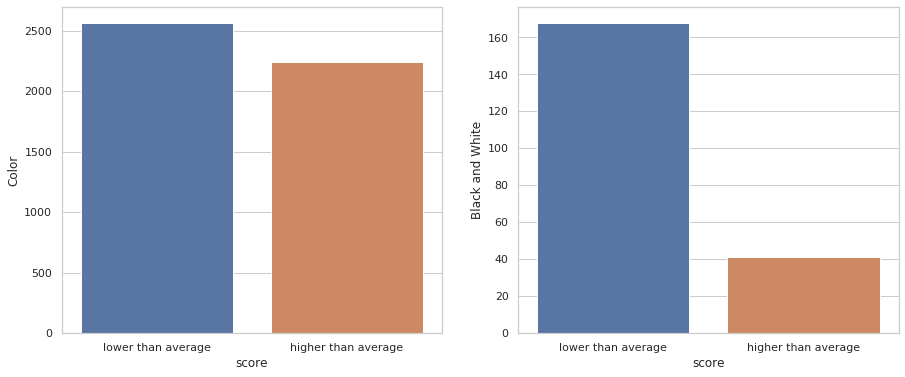

In [90]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 6));
sns.set(style="whitegrid")
sns.boxplotg = sns.barplot(y="Color", x="score", data=df, ax=ax1);
sns.barplot(y="Black and White", x="score", data=df, ax=ax2);

In [100]:
def Pirson(data,significant_level): 
    meanings=data.keys() 
    t_summ_1=sum(data[meanings[1]]) 
    t_summ_2=sum(data[meanings[2]])
    
    meanings=list(meanings)
    
    if(t_summ_1 != t_summ_2):
        n_d1 = list(map( lambda i: (i*100)/t_summ_1, data[meanings[1]] ))
        n_d = list(map( lambda i: ((i*100)/t_summ_1)*t_summ_2/100, data[meanings[1]] ))
        data[meanings[1]]=n_d  
        data['percentage ratio for color']=n_d1  
    
    n_d2 = list(map( lambda i: (i*100)/t_summ_2, data[meanings[2]] ))
    data['percentage ratio for black and white']=n_d2
    n1_n2=[]
    for index, row in data.iterrows():
        data['(ni-ni`)^2']=((row[meanings[1]]-row[meanings[2]])**2)

    meanings=data.keys()
    
    for index, row in data.iterrows(): 
        data['((ni-ni`)^2)/ni`']=(row[meanings[3]]/row[meanings[2]]) 
        
    meanings=data.keys()
    ch_em=sum(data[meanings[4]])
    r=len(data)-1 
    
    ch_pirson = pd.read_excel("Таблиця критичних значень для критерію Пірсона.xlsx").iloc[r, 1 if(significant_level == 0.01) else 2]
    if(ch_em>ch_pirson):
        print("According to Pirson test, there is a static difference betwen given groups") 
    else:
        print("According to Pirson test, there is no static difference between given groups")
    return ch_em>ch_pirson
    
    
    
Pirson(df,0.001)

According to Pirson test, there is a static difference betwen given groups


True

In [106]:
sign_01 = Pirson( df, 0.01 )
sign_05 = Pirson( df, 0.001)

results = pd.DataFrame ( 
    [sign_01, sign_05],
    columns = ["Статистична розбіжність"],
    index = ['0.01', '0.05']
)

results.index.name = 'Рівень значимості'

results

According to Pirson test, there is a static difference betwen given groups
According to Pirson test, there is a static difference betwen given groups


,Статистична розбіжність
Рівень значимості,
0.01,True
0.05,True


<h1>Висновок</h1>
<p>
Під час порівняння двох груп на декількох груп за розподіленням ознаки з допомогою розрахунку критерію Пірсона було отримано результат, що довзволяє припустити статистично значиму розбіжність між групами як на рівні значимості 0.05, так і 0.01
    </p>